# Bibliometric network analysis & topic modelling

Bibliometric data from academic databases can be used to find relationships between metadata (authors, titles, citations etc.) and discover dominant topics. In this kernel, we'll use the Metaknowledge package and an information science and bibliometrics dataset from Web of Science/scopus to perform network analysis. 

From: https://arxiv.org/ftp/arxiv/papers/2304/2304.14516.pdf

Exploratory Data Analysis (EDA) capabilities encompass the tools’ 
capacity for preliminary data analysis, pattern and trend identification, and data visualization, empowering
researchers to uncover insights and formulate hypotheses. Network Analysis capabilities indicate the tools’
proficiency in examining and visualizing intricate relationships among entities such as authors, citations,
and keywords, thereby aiding researchers in deciphering data structure and dynamics. Artificial Intelligence
capabilities utilize Deep Learning techniques, like Topic Modeling, Embedding vectors, Text
Summarization, and General NLP tasks, to augment the tools’ effectiveness.

The most common features these tools share include Citation Analysis, Collaboration Analysis,
and World Collaboration Analysis, with many tools supporting Similarity Analysis and Topic Modeling.
Both pyBibX and Scientopy offer a wide range of features.

Three of the most commonly used scientific databases are WoS, Scopus, and PubMed. While these
databases share similarities in their coverage of scientific literature, they also have unique features that set
them apart. Researchers working in a specific field, such as medicine, may find PubMed the most relevant,
as it covers biomedical literature in-depth. On the other hand, researchers working in interdisciplinary fields
may find WoS or Scopus more valuable, as they cover a broad range of subjects.

I'll try and answer the following questions:

Section 1
    (i) How has the research domain evolved over the last decade? 
    (ii) what are the major topics and trends within the data? 
    (iii) how is research measuring the impact of accessibility to retail being conducted? 

Section 2
    (iv) How do researchers identify equitable access to retail? (methods and metrics)
    (v) What are the theoretical frameworks that guide research in access to retail?
    (vi) Which geographic scale is used by researchers to assess inequities in retail accessibility?
    (vii) What demographic groups are entitled to equitable access in research, and how are they involved in decision-making?

Other sources: 

https://www.kaggle.com/code/kruttika17/bibliometric-network-analysis-topic-modelling

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


# Libraries

In [60]:
#Requiered libraries
import numpy as np
import pandas as pd
import textwrap
from pyBibX.base import pbx_probe
from prettytable import PrettyTable
path = 'C:/Users/cata1/OneDrive - University of California, Davis/TTP_224_Equity/LitReview/files/'

# Loading data

In [61]:
#Loading data
# Read data into papers
file_name = path + 'scopus6.bib'
database  = 'scopus'
bibfile = pbx_probe(file_bib = file_name, db = database)
datat = pd.DataFrame(bibfile.data)


A Total of 249 Documents were Found ( 251 Documents and 2 Duplicates )

Article = 202
Book = 8
Book chapter = 19
Conference paper = 9
Editorial = 2
Review = 9


# Exploratory Data Analysis

In this section, we will perform EDA on the merged dataset. This essential step in data analysis helps us
understand the data’s underlying structure, patterns, and relationships. Also, this step provides a
comprehensive overview of the merged dataset and enables us to identify key features and trends that may
inform further analysis.

## 1. Statistics related to the collection of documents

In [62]:
# Generate EDA (Exploratory Data Analysis) Report
report = bibfile.eda_bib()

# Check report
report


,Main Information,Results
0,Timespan,1981-2024
1,Total Number of Countries,64
2,Total Number of Institutions,454
3,Total Number of Sources,171
4,Total Number of References,0
5,Total Number of Languages,7
6,--chinese (# of docs),6
7,--english (# of docs),237
8,--japanese (# of docs),1
9,--polish (# of docs),1


In [63]:
# Check Docs IDs
data_ID = pd.DataFrame(bibfile.table_id_doc)
display(data_ID.iloc[:15])
data_ID.to_excel(path + 'data_ID.xlsx')

,ID,Document
0,0,"Safizadeh, Mina and Maghsoodi Tilaki, Mohammad..."
1,1,"Chen, Wanxu and Wang, Guanzheng and Xu, Ning a..."
2,2,"Niu, Baozhuang and Mu, Zihao and Chen, Lei (20..."
3,3,"Long, Alfie and Carney, Ffion and Kandt, Jens ..."
4,4,"Yiu, Chung Yim Edward and Cheung, Ka Shing and..."
5,5,"Nguyen-Phuoc, Duy Q. and Zhou, Meng and Hong C..."
6,6,"Dede-Bamfo, Nathaniel and Chow, T. Edwin and E..."
7,7,"Kim, Min Hee and Clarke, Philippa J. and Dunkl..."
8,8,"Kim, Hongjik and Hino, Kimihiro and Asami, Yas..."
9,9,"Zhang, Yi and Wu, Ying and Zhou, Wei (2023). H..."


In [64]:
# Check Docs IDs per Type
data_Type = pd.DataFrame(bibfile.id_doc_types())
display(data_Type)

,Document Types,IDs
0,Article,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,..."
1,Book,"[94, 192, 199, 203, 210, 219, 225, 241]"
2,Book chapter,"[13, 24, 53, 65, 74, 117, 137, 142, 143, 158, ..."
3,Conference paper,"[12, 61, 70, 104, 134, 136, 198, 220, 231]"
4,Editorial,"[130, 172]"
5,Review,"[21, 52, 73, 99, 140, 147, 169, 197, 213]"


In [65]:
# Check Authors IDs
data_Authors = pd.DataFrame(bibfile.table_id_aut)
display(data_Authors.iloc[:15])

,ID,Author
0,a_0,"abbas, sammar"
1,a_1,"abdullah, aldrin"
2,a_2,"adiba, saima"
3,a_3,"admati, anat"
4,a_4,"akinola, modupe"
5,a_5,"albaladejo, romana"
6,a_6,"ali ahmed, mokaddes"
7,a_7,"almudena, nolasco-cirugeda"
8,a_8,"alnoor, alhamzah"
9,a_9,"altaweel, mark"


In [66]:
# Check Sources IDs
data_Sources = pd.DataFrame(bibfile.table_id_jou)
display(data_Sources.iloc[:15])

,ID,Source
0,j_0,sustainability
1,j_1,j. transp. geogr.
2,j_2,j. retail. consum. serv.
3,j_3,cities
4,j_4,travel behav. soc.
5,j_5,transp. res. part d transp. environ.
6,j_6,transp. res. part a policy pract.
7,j_7,plos one
8,j_8,environ. plann.
9,j_9,comput. environ. urban syst.


In [67]:
# Check Institutions IDs
data_Uni = pd.DataFrame(bibfile.table_id_uni)
display(data_Uni)

,ID,Institution
0,i_0,faculty of spatial sciences
1,i_1,tsinghua university
2,i_2,collaborative innovation center of geospatial ...
3,i_3,university of isfahan
4,i_4,the university of sydney business school
...,...,...
449,i_449,university at buffalo
450,i_450,beijing transportation research center
451,i_451,pakistan
452,i_452,school of intelligent systems engineering


In [68]:
# Check Countries IDs
data_Countries = pd.DataFrame(bibfile.table_id_ctr)
display(data_Countries)

,ID,Country
0,c_0,Japan
1,c_1,Finland
2,c_2,Estonia
3,c_3,Hong Kong
4,c_4,China
...,...,...
59,c_59,New Zealand
60,c_60,Slovenia
61,c_61,Chile
62,c_62,Serbia


In [69]:
# Check Keywords IDs
data_Key = pd.DataFrame(bibfile.table_id_kwa)
display(data_Key)

,ID,KWA
0,k_0,accessibility
1,k_1,public transport
2,k_2,transport
3,k_3,covid-19
4,k_4,gis
...,...,...
964,k_964,accessibility modelling
965,k_965,accessibility measures
966,k_966,accessibility measure
967,k_967,accessibility index


## 2. WordCloud and n-grams

One way to gain further insights about the documents would be to conduct a text analysis using wordclouds and n-grams. By generating wordclouds and n-grams (n is a positive integer greater than 1) from the abstracts of the documents, it may be possible to identify common themes, topics,
and terminology used by the authors. The 3-gram analysis provided insights into the specific concepts and techniques
discussed in the documents.

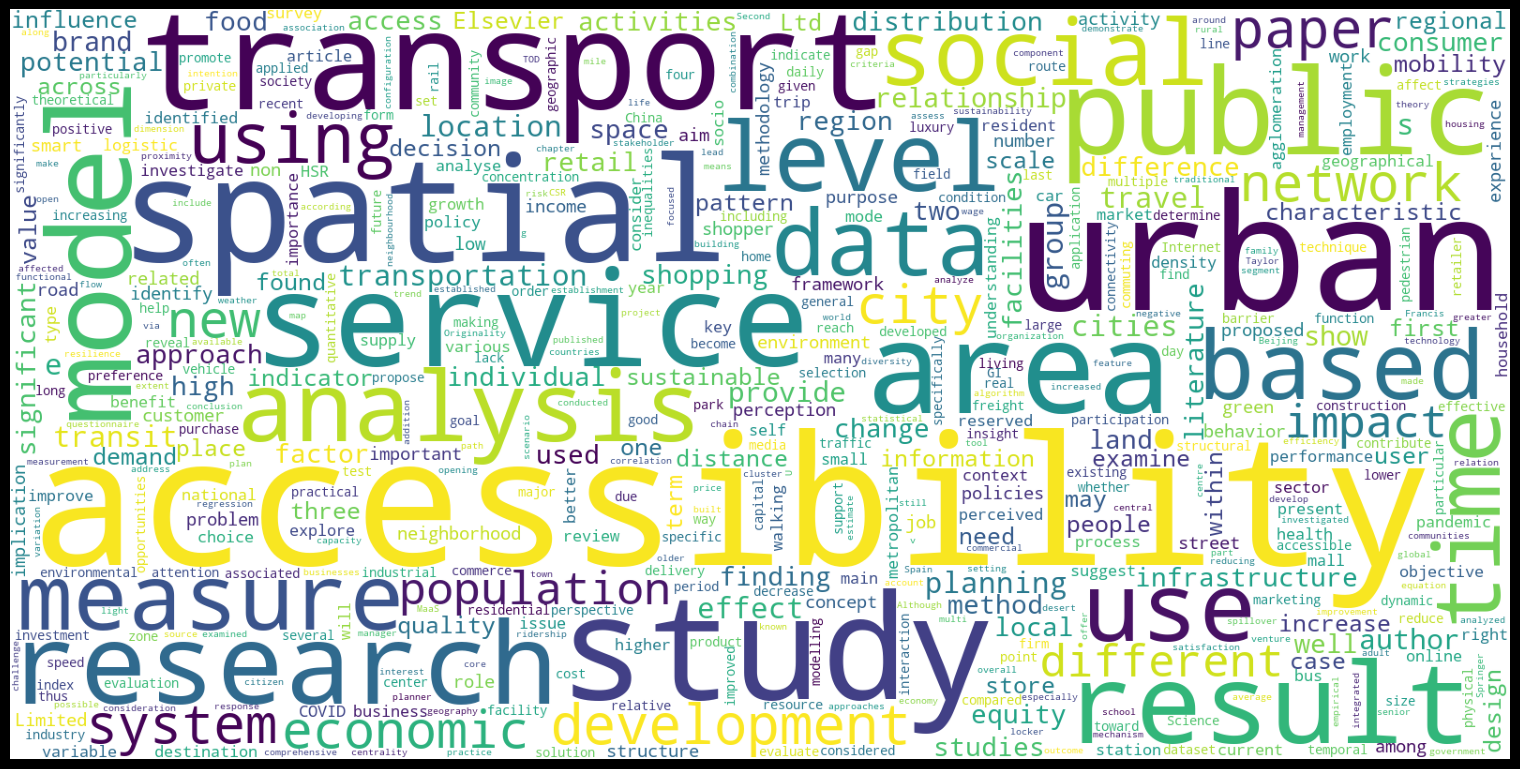

In [70]:
# WordCloud
bibfile.word_cloud_plot(entry = 'abs', size_x= 15, size_y= 10, wordsn=500)

In [71]:
# Check Table
table = PrettyTable()
data_wd = bibfile.ask_gpt_wd
table.field_names = ['Wprd', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value,4)])
print(table)


+----------------+------------+
|      Wprd      | Importance |
+----------------+------------+
| accessibility  |    1.0     |
|     urban      |   0.8015   |
|    spatial     |   0.6392   |
|     study      |   0.6366   |
|   transport    |   0.5799   |
|    service     |   0.5284   |
|      area      |   0.4974   |
|     public     |   0.433    |
|     model      |   0.4046   |
|    research    |   0.384    |
|     result     |   0.3789   |
|    analysis    |   0.3737   |
|      use       |   0.366    |
|     level      |   0.3557   |
|     based      |   0.3505   |
|    measure     |   0.3325   |
|      data      |   0.3299   |
|     social     |   0.3299   |
|      time      |   0.3299   |
|     using      |   0.3144   |
|  development   |   0.299    |
|     paper      |   0.2938   |
|     system     |   0.2887   |
|    network     |   0.2809   |
|      city      |   0.2784   |
|    economic    |   0.2732   |
|      new       |   0.2706   |
|   population   |   0.2655   |
|     im

In [72]:
# N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 30)

In [73]:
# Check table 
data_ng = bibfile.ask_gpt_ng
display(data_ng)

,Word,Freq
0,land use planning,9
1,united states of,8
2,states of america,8
3,urban development urban,7
4,geographic information systems,7
5,public transport transportation,5
6,geographic information system,5
7,transportation development transportation,5
8,urban area urban,5
9,transportation system urban,4


## 3. Clusterization based on main topics

the next step in EDA is to
transform the abstracts into numerical representations. The abstracts of the documents can be
transformed into a Term Frequency-Inverse Document Frequency (TF-IDF) matrix or Embeddings. Once
the documents are represented this way, dimension reduction techniques such as UMAP or TSVD can be
applied to reduce the dimensionality to two dimensions for visualization purposes. Document clustering
based on dimension reduction techniques is widely used to analyze texts; by reducing the dimensionality
of the data, these techniques can reveal the underlying structure of the text data, making it easier to explore
and interpret (RAMKUMAR & POORNA, 2016). The final step is to group the documents into clusters
using the k-means algorithm (McQUEEN, 1967) to group the documents in k natural groups based on a
distance measure and plot the results, with each cluster highlighted by a different color. By visualizing the
clusters, researchers can quickly identify patterns and relationships within the data and use this information
to make more informed decisions about the next steps in their analysis and help researchers to uncover new
insights and research directions.

In [74]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view = 'notebook',
                                              corpus_type = 'abs',
                                              stop_words = ['en'],
                                              rmv_custom_words = [],
                                              custom_label = [],
                                              custom_projection = [],
                                              n_components = 2,
                                              n_clusters = 10,
                                              tf_idf = False,
                                              embeddings = False,
                                              method = 'umap')

In [75]:
# Check table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
datat =  pd.merge(datat, data_pr, left_index=True, right_index=True)
datat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   abbrev_source_title      249 non-null    object 
 1   abstract                 249 non-null    object 
 2   address                  249 non-null    object 
 3   affiliation              249 non-null    object 
 4   affiliations             249 non-null    object 
 5   art_number               249 non-null    object 
 6   author                   249 non-null    object 
 7   author_keywords          249 non-null    object 
 8   chemicals_cas            249 non-null    object 
 9   coden                    249 non-null    object 
 10  correspondence_address   249 non-null    object 
 11  correspondence_address1  249 non-null    object 
 12  document_type            249 non-null    object 
 13  doi                      249 non-null    object 
 14  editor                   2

Identifying the themes or topics can be further investigated using various techniques. One way is to create
an evolution plot of the keywords used in the abstracts over the years, and this can give insight into how
the topic has evolved and what subtopics are emerging. By looking at how the frequency and usage of
certain words change over time, researchers can gain insights into the shifting focus of the field and the
emergence of new topics

In [76]:
year_evol = bibfile.plot_evolution_year(view = 'notebook',
                            stop_words = ['en'],
                            rmv_custom_words = [],
                            key = 'abs',
                            topn = 10,
                            start = 1981,
                            end = 2024)

Allied with the evolution plot, we can also use a treemap to aid our understanding of the dominant central
theme of all 184 documents. By applying this technique to the entire set of keywords plus across all 294
documents, we can quickly identify the most frequently occurring keywords, which may indicate significant
themes and topics. Figure 04 shows the results for the top 15 keywords plus

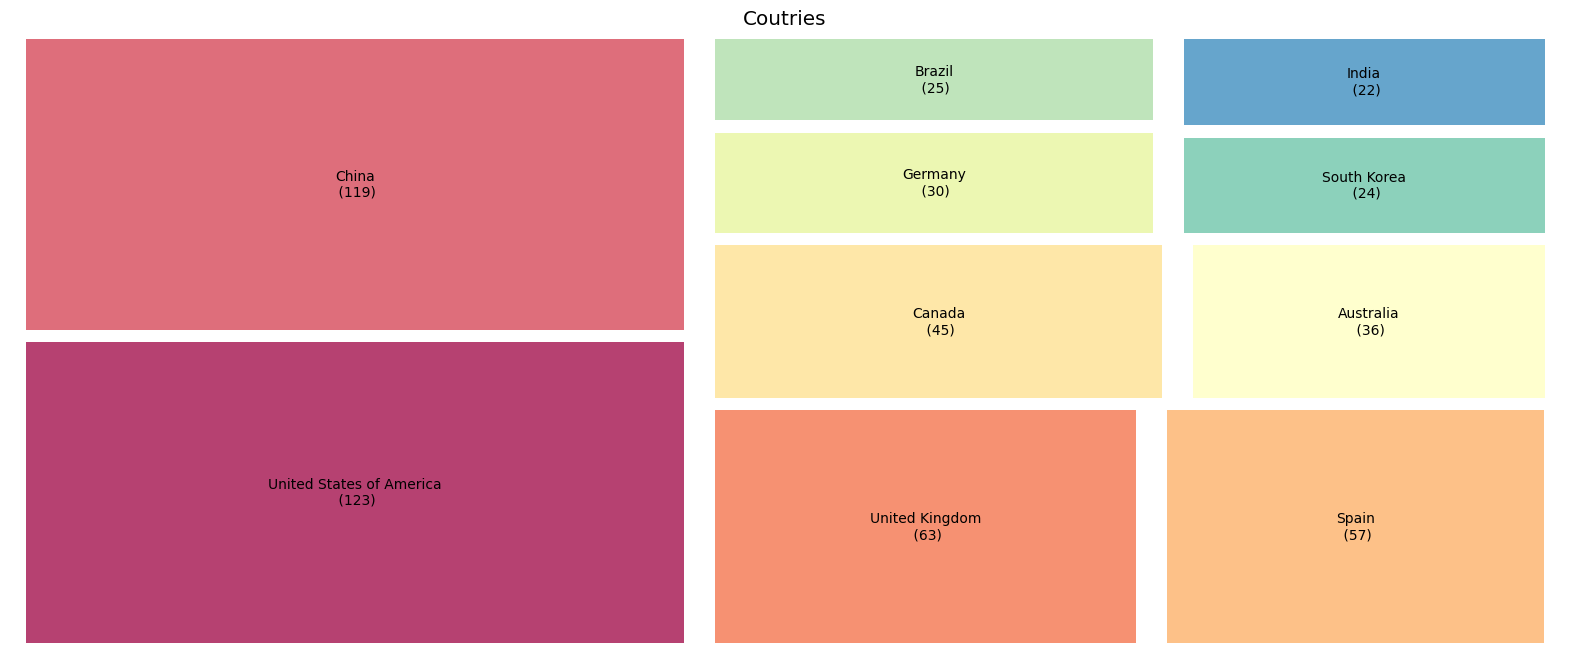

In [77]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'ctr', topn = 10, size_x = 20, size_y = 8)

In [78]:
# view table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 1981: public (1), services (1), emergency (1), jointly (1), fire (1), computer (1), delivered (1), libraries (1), extensive (1), allocation (1) 1987:
urban (1), taking (1), similar (1), aspects (1), analytical (1), reference (1), authorities (1), settings (1), identifies (1), theories (1) 1994:
research (1), researchers (1), primarily (1), covering (1), median (1), maximum (1), programming (1), classified (1), required (1), coverage (1) 2003:
accessibility (1), twin (1), advantages (1), call (1), broader (1), section (1), drawn (1), productivity (1), surplus (1), illustrates (1) 2004:
constraints (2), paper (2), amounts (2), relative (2), space (2), model (2), time (2), large (2), points (1), survival (1) 2005: social (1),
remuneration (1), regulations (1), cultural (1), wages (1), debate (1), deeply (1), massive (1), informative (1), century (1) 2006: quality (2),
results (2), people (2), factors (2), paper (2), gis (2), important (2), spatial (2), divided (1), move (1) 2008: study (

## 4. Network Analysis

Now that the EDA is complete, we can move on to Network Analysis, which focuses on the relationships
between scientific publications, authors, and journals. In Network Analysis, publications, authors, and
journals are represented as nodes, and their relationships are represented as edges. Network analysis can
identify collaboration patterns between authors or institutions, map ideas within a field, or identify critical
publications or journals within a particular research area (DING, 2011).

In [79]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst'], topn = 30)

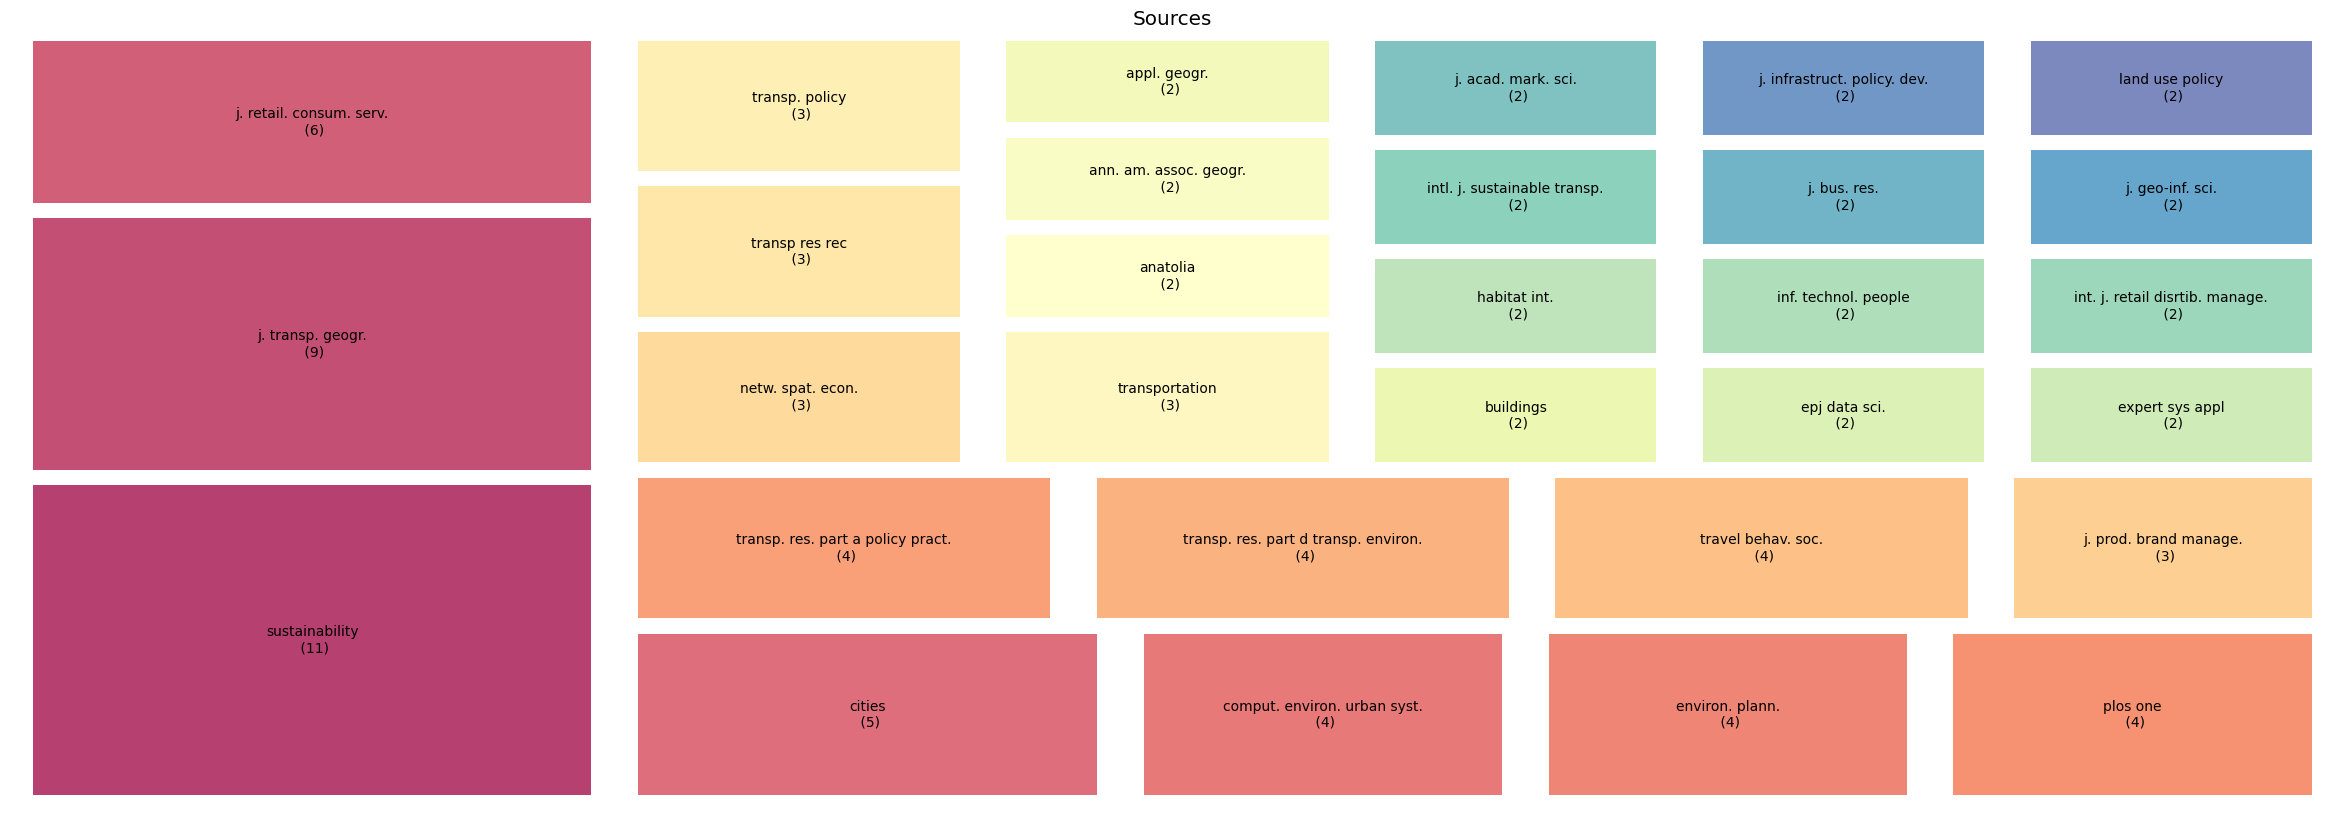

In [80]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 30, size_x = 30, size_y = 10)

In [81]:
# Authors productivity plot. It informs for each year documents (IDs) published for each author
bibfile.authors_productivity(view = 'notebook', topn = 30)

In [82]:
# View Table
data_ap = bibfile.ask_gpt_ap
display(data_ap)

,2008,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
"soria-lara, julio a.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,1.0,0.0
"arranz-lópez, aldo",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,1.0,0.0
"schwanen, tim",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"mccarney, gary",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
"goliszek, sławomir",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
"farber, steven",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"cao, mengqiu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
"xia, jianhong",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
"vilnai-yavetz, iris",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"tranos, emmanouil",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


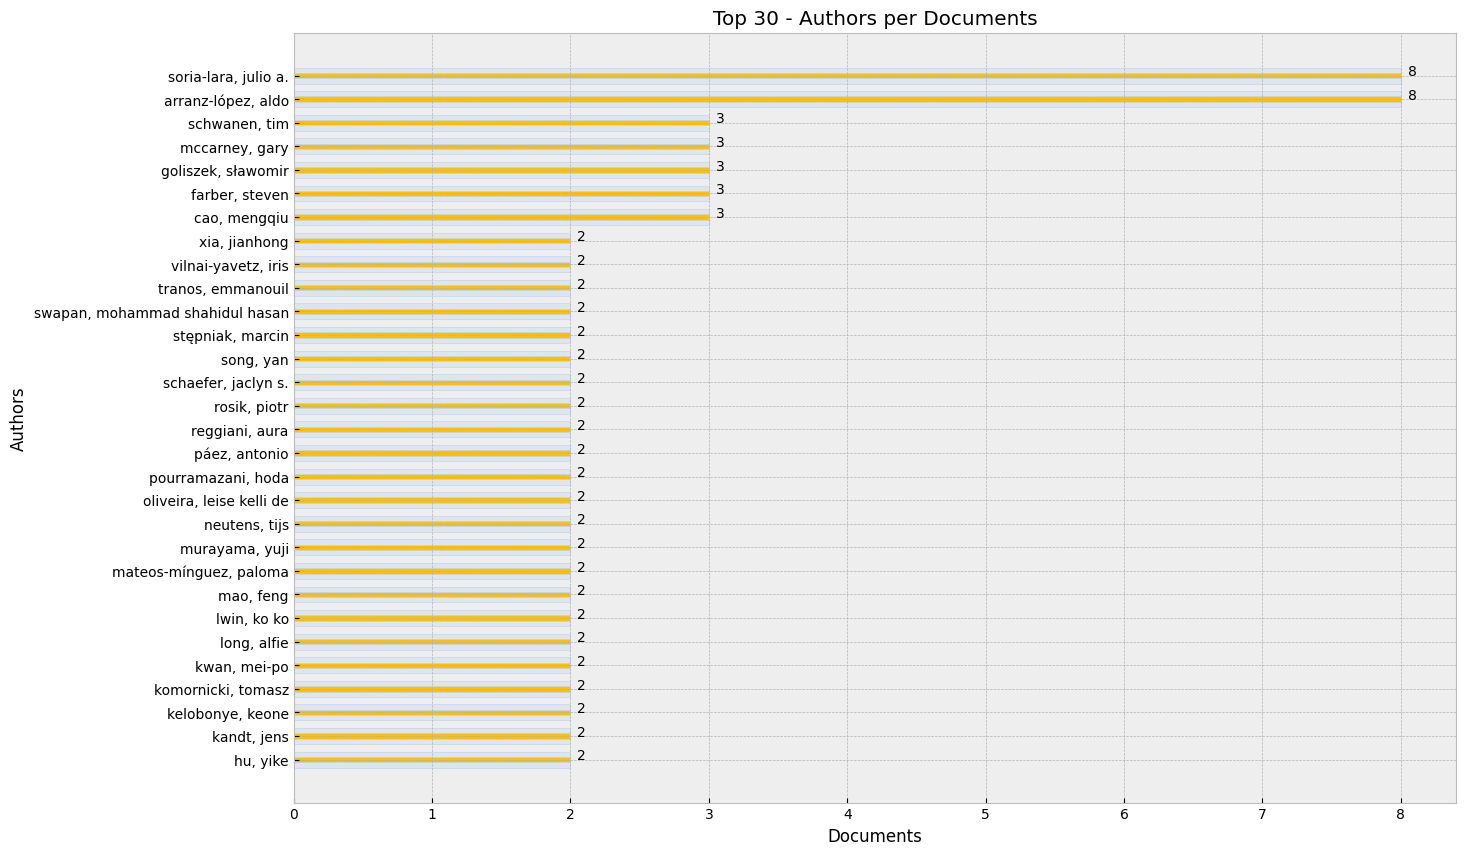

In [83]:
# Bar Plots
bibfile.plot_bars(statistic = 'apd', topn = 30, size_x = 15, size_y = 10)

In [84]:
# View Table
data_bp = bibfile.ask_gpt_bp
display(data_bp)

,Documents,Authors
0,"soria-lara, julio a.",8
1,"arranz-lópez, aldo",8
2,"schwanen, tim",3
3,"mccarney, gary",3
4,"goliszek, sławomir",3
5,"farber, steven",3
6,"cao, mengqiu",3
7,"xia, jianhong",2
8,"vilnai-yavetz, iris",2
9,"tranos, emmanouil",2


In [85]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 3, node_labels = True, label_type = 'id', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [86]:
# View Table
data_adj = bibfile.ask_gpt_adj
display(data_adj)

,Node 1 (Author),Node 2 (Author),Node 1 Cluster,Node 2 Cluster
0,ID: a_133,ID: a_540,2.0,2.0
1,ID: a_647,ID: a_576,3.0,3.0
2,ID: a_139,ID: a_576,3.0,3.0
3,ID: a_396,ID: a_598,4.0,4.0
4,ID: a_14,ID: a_15,4.0,4.0
5,ID: a_15,ID: a_416,4.0,4.0
6,ID: a_15,ID: a_422,4.0,4.0
7,ID: a_15,ID: a_597,4.0,4.0
8,ID: a_15,ID: a_598,4.0,4.0
9,ID: a_529,ID: a_598,4.0,4.0


In [87]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['Jiao, Junfeng'], node_only = True)

In [88]:
# Network
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

# 5. Artificial Intelligence Analysis

After performing the EDA and Network Analysis, our next step is to use Artificial Intelligence tools to gain
deeper insights into the collection of documents. In particular, Embeddings, Topic Modeling, and Text
Summarization, both based on Deep Learning techniques, can help to uncover hidden themes and patterns
within the data. By automatically identifying and summarizing key topics and trends, these tools can
provide a more efficient and accurate way to extract meaning from large amounts of text data.

Our study combined UMAP with Embeddings to project the abstracts onto a lower-dimensional space and
visualize their relationship. The Embeddings are obtained using the Sentence-BERT Deep Learning Model
developed by Reimers and Gurevych (2019). In addition to visualizing the relationship between abstracts,
the Embeddings can be used as input to the other Deep Learning techniques. By using these Embeddings
as input, the Deep Learning models can better capture the semantic meaning and context of the text. These
representations can improve results in tasks such as identifying key topics or generating concise summaries,
demonstrating the versatility and usefulness of Embeddings in various NLP tasks.

In [89]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [90]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words  = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                        'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                        'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                        'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                        Name  \
0     -1     12  -1_location_services_public_discrimination   
1      0    170     0_accessibility_urban_spatial_transport   
2      1     67                 1_study_brand_shopping_food   

                                      Representation  \
0  [location, services, public, discrimination, p...   
1  [accessibility, urban, spatial, transport, pub...   
2  [study, brand, shopping, food, retail, researc...   

                                 Representative_Docs  
0  [increasing awareness concern status mobility ...  
1  [paper focuses urban regeneration practices ce...  
2  [amidst growing interest enhancing academic un...  


In [91]:
# NLP
# Each document Topic
topics = bibfile.topics

In [92]:
# Saving topics
topics2 = pd.DataFrame(topics)
datat =  pd.merge(datat, topics2, left_index=True, right_index=True)
datat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   abbrev_source_title      249 non-null    object 
 1   abstract                 249 non-null    object 
 2   address                  249 non-null    object 
 3   affiliation              249 non-null    object 
 4   affiliations             249 non-null    object 
 5   art_number               249 non-null    object 
 6   author                   249 non-null    object 
 7   author_keywords          249 non-null    object 
 8   chemicals_cas            249 non-null    object 
 9   coden                    249 non-null    object 
 10  correspondence_address   249 non-null    object 
 11  correspondence_address1  249 non-null    object 
 12  document_type            249 non-null    object 
 13  doi                      249 non-null    object 
 14  editor                   2

In [93]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs


In [94]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [95]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [96]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [97]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [98]:
# NLP
bibfile.topics_representatives()
bibfile.topics

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 -1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 0,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 -1,
 -1,
 

In [99]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  1 Correlation:  0.087
Topic:  0 Correlation:  0.031
Topic:  -1 Correlation:  0.03


In [100]:
# NLP
bibfile.topic_model.save('my_topic_model')


2024-05-09 22:24:16,125 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


# Save topic info to excel

In [103]:
from bertopic import BERTopic
loaded_topic_model = BERTopic.load('my_topic_model')

# Save data
data = pd.DataFrame(loaded_topic_model.get_topic_info())
data.to_excel(path + 'my_topic_model.xlsx')

# Check total
datat.to_excel(path + 'data_total.xlsx')


PermissionError: [Errno 13] Permission denied: 'C:/Users/cata1/OneDrive - University of California, Davis/TTP_224_Equity/LitReview/files/my_topic_model.xlsx'